# Exploratory Data Analysis of Covid-19 on House Price Index Due to possible Impact of Employment
## Varsha Tomar

## Introduction

The world has shocked with Covid-19 effects with quarantines, lockdowns, shutting of business, and job loss. In this study, I wish to understand if the impact on Housing Price Index during Covid-19 is due to loss in the employment. To perform the data analysis, I obtained three datasets from open-source government agencies, cleaned the data-sets and merge them to a final dataset. Final data set have variables: State, Year, Employed, Unemployed, HPI_SA, HPI_NSA, Total covid cases, and Total covid deaths. This study tries to analyze the US data to understand the volatility in housing price index and employment before and during Covid-19.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Accessing Datasets
### Following three datasets were used to perform the model regression analysis:
1. Covid cases: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
Centers for Disease Control and Prevention (CDC) has a huge database with latest updates on covid-19
cases. This data set is collection of covid-19 cases, and deaths by US states till October, 2022.
There are a total of 15 variables in this data set are: submission_date, state, tot_cases, conf_cases,
prob_cases, new_cases, pnew_cases, tot_death, conf_death, prob_death, new_death, pnew_death, created_at, consent_cases, and consent_deaths
2. Unemployment rate: https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
The unemployment data is recovered from US Department of Agriculture, Economic
research studies, which will provide data on unemployment and median household income for US
States and counties for 2000-2021 (last update – 6/3/2022).
This data set has a total of 5 variables: FIPS_Code, State, Area Name, Attribute, and Value.
3. Housing Price: https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx#mpo
The dataset for housing price will be collected from Federal Housing Finance agency within
year 2020-2022.
This data set has a total of 6 variables: state, yr, qtr, index_nsa, index_sa, and Warning

## Cleaning Datasets

### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails.
##### The below function performed the descriptive analysis of variables during the cleaning process from raw dataset to the final dataset.

In [2]:
def df_stats(dataframe):
    """This function allows to obtian dataframe's size details and descriptive information on 
    count, mean, std, median, percentiles, min and max values
    """
    # dataframe.size
    print(f"size: {dataframe.size}")

    # dataframe.shape
    print(f"\nrows x columns: {dataframe.shape}")

    # to know the dtype attributes
    print(f"\nDatatypes:\n{dataframe.dtypes}")
    
    # Summarrize the dataframe
    print(f"\nSummary:\n{dataframe.describe()}")

### 1. US Employment Data

In [3]:
# Import Employemnt Data set
empld_df = pd.read_csv("Unemployment.csv")
empld_df.head()

,FIPS_Code,State,Area_name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,1.426016e+08
1,0,US,United States,Employed_2000,1.369049e+08
2,0,US,United States,Unemployed_2000,5.696723e+06
3,0,US,United States,Unemployment_rate_2000,3.994853e+00
4,0,US,United States,Civilian_labor_force_2001,1.437865e+08


In [4]:
# Descriptive Charactersitics of raw employment data set
df_stats(empld_df)

size: 1517695

rows x columns: (303539, 5)

Datatypes:
FIPS_Code      int64
State         object
Area_name     object
Attribute     object
Value        float64
dtype: object

Summary:
           FIPS_Code         Value
count  303539.000000  3.035390e+05
mean    31309.310827  6.781426e+04
std     16232.373796  1.840969e+06
min         0.000000  0.000000e+00
25%     19025.000000  1.070000e+01
50%     30019.000000  2.142000e+03
75%     46095.000000  1.277100e+04
max     72153.000000  1.638159e+08


In [5]:
# Year is separted by an underscore delimiter in Attribute variable. I separated it into a differnt column with 
# variable name "Year".
empld_df[["Attribute", "Year"]] = empld_df.Attribute.str.rsplit('_', 1, expand=True)
# typecast yeat dtype from object to numeric for easy filtering and data anlysis
empld_df["Year"] = pd.to_numeric(empld_df["Year"])
# Get the data for 2017 and over years
empld_df = empld_df[(empld_df['Year'] >= 2017)]

In [6]:
def empl_data_clean(dataframe, attribute):
    """The function cleans the empld_df data based on all US State and for Year 2017-2021.
    attribute can be : "Employed", "Unemployed", "Unemployment_rate", "Civilian_labor_force"
    return: cleaned data frame df
    """    
    
    # Collect all rows with Employed attribute and States that are not names "US" but actual US states
    df = dataframe.loc[(dataframe["Attribute"] == attribute) & (dataframe["State"] != "US")]
    # Since Attribute column is not required, drop that column
    df = df.drop(columns="Attribute")
    # Rename the Column "Value" name to "Employed"
    df = df.rename(columns={"Value": attribute})
    # Filter the group by State and Year and sum all the employed data for the grouped values
    df = df.groupby(["State", "Year"])[attribute].sum().reset_index()
    # Since the employed data collectively sum the entire state and respective counties data, divide the total by 2
    df[attribute] = round(df[attribute]/2, 0)
    return df 

In [7]:
# Data clean up for Employed in all US state and year from 2017 to 2021
emp_df = empl_data_clean(empld_df, "Employed")
# Data clean up for Unemployed in all US state and year from 2017 to 2021
unemp_df = empl_data_clean(empld_df, "Unemployed")
# Merge emp_df and unemp_df dataframes to a final dataframe
final_emp_df = pd.merge(emp_df, unemp_df, on=("State", "Year"))

final_emp_df.head(10)

,State,Year,Employed,Unemployed
0,AK,2017,337108.0,23482.0
1,AK,2018,334242.0,21210.0
2,AK,2019,333540.0,19344.0
3,AK,2020,318278.0,28605.0
4,AK,2021,332264.0,22672.0
5,AL,2017,2103874.0,99588.0
6,AL,2018,2153082.0,87399.0
7,AL,2019,2199870.0,72025.0
8,AL,2020,2121149.0,147162.0
9,AL,2021,2169724.0,77274.0


In [8]:
# Descriptive characterstics for final cleaned employment data frame for years 2017 to 2021
df_stats(final_emp_df)

size: 1036

rows x columns: (259, 4)

Datatypes:
State          object
Year            int64
Employed      float64
Unemployed    float64
dtype: object

Summary:
              Year      Employed    Unemployed
count   259.000000  2.590000e+02  2.590000e+02
mean   2018.996139  2.983013e+06  1.598720e+05
std       1.418313  3.320938e+06  2.212265e+05
min    2017.000000  2.767400e+05  8.352000e+03
25%    2018.000000  7.851805e+05  3.875950e+04
50%    2019.000000  1.955238e+06  9.331600e+04
75%    2020.000000  3.620544e+06  1.884945e+05
max    2021.000000  1.861261e+07  1.934451e+06


### 2. US Housing Price Index Data

In [9]:
# HPI dataset
HPI_df = pd.read_excel("HPI_PO_state.xls")
HPI_df.head(10)

,state,yr,qtr,index_nsa,index_sa,Warning
0,AK,1991,1,100.00,100.00,"* Note that this state has fewer than 15,000 t..."
1,AK,1991,2,101.03,100.27,"* Note that this state has fewer than 15,000 t..."
2,AK,1991,3,102.16,101.36,"* Note that this state has fewer than 15,000 t..."
3,AK,1991,4,102.51,102.36,"* Note that this state has fewer than 15,000 t..."
4,AK,1992,1,102.87,102.81,"* Note that this state has fewer than 15,000 t..."
5,AK,1992,2,104.37,103.59,"* Note that this state has fewer than 15,000 t..."
6,AK,1992,3,105.17,104.33,"* Note that this state has fewer than 15,000 t..."
7,AK,1992,4,104.51,104.47,"* Note that this state has fewer than 15,000 t..."
8,AK,1993,1,104.87,104.71,"* Note that this state has fewer than 15,000 t..."
9,AK,1993,2,107.32,106.50,"* Note that this state has fewer than 15,000 t..."


In [10]:
# Descriptive characterstics for raw HPI dataset collected from .....
df_stats(HPI_df)

size: 38556

rows x columns: (6426, 6)

Datatypes:
state         object
yr             int64
qtr            int64
index_nsa    float64
index_sa     float64
Warning       object
dtype: object

Summary:
                yr          qtr    index_nsa     index_sa
count  6426.000000  6426.000000  6426.000000  6426.000000
mean   2006.253968     2.484127   194.371576   193.681738
std       9.096264     1.118008    81.265486    80.783492
min    1991.000000     1.000000    82.540000    82.340000
25%    1998.000000     1.000000   134.137500   133.740000
50%    2006.000000     2.000000   185.315000   184.985000
75%    2014.000000     3.000000   228.297500   227.695000
max    2022.000000     4.000000   731.100000   721.540000


In [11]:
def clean_HPI(data_frame):
    """This function cleans housing data frame.
    Returns: Clean housing dataframe.
    """
    # Rename the columns
    df = data_frame.rename(columns={"state": "State", "yr": "Year", "index_nsa": "HPI_NSA", "index_sa": "HPI_SA"})
    # Drop columns qtr and Warning
    df = df.drop(columns=["qtr","Warning"])
    # Only have information for 2017 or over years
    df = df[(df['Year'] >= 2017)]
    # Since the data was for 4 quaters, I took mean of Index to reflect housing price for that year
    df = df.groupby(["State", "Year"])[["HPI_NSA","HPI_SA"]].mean().round(2).reset_index()
    return df  

In [12]:
final_clean_HPI = clean_HPI(HPI_df)
final_clean_HPI.head(10)

,State,Year,HPI_NSA,HPI_SA
0,AK,2017,251.07,250.05
1,AK,2018,255.64,254.54
2,AK,2019,264.62,263.43
3,AK,2020,276.87,275.60
4,AK,2021,306.56,305.18
5,AK,2022,329.22,328.16
6,AL,2017,205.08,204.38
7,AL,2018,216.29,215.55
8,AL,2019,228.94,228.15
9,AL,2020,248.23,247.38


In [13]:
#  Descriptive characterstics of final clean Housing Index Pricing data set from 2017 to 2021
df_stats(final_clean_HPI)

size: 1224

rows x columns: (306, 4)

Datatypes:
State       object
Year         int64
HPI_NSA    float64
HPI_SA     float64
dtype: object

Summary:
              Year     HPI_NSA      HPI_SA
count   306.000000  306.000000  306.000000
mean   2019.500000  310.892712  309.750294
std       1.710623   99.869372   98.991941
min    2017.000000  167.070000  166.540000
25%    2018.000000  241.277500  240.867500
50%    2019.500000  283.880000  283.235000
75%    2021.000000  346.502500  346.905000
max    2022.000000  714.990000  709.840000


### 3. US Covid-19 Data

In [14]:
# Covid-19 Dataset
covid_df = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv")
covid_df.head(10)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree
6,04/03/2020,ND,173,NaN,NaN,14,NaN,3,NaN,NaN,0,NaN,04/03/2020 04:22:39 PM,Agree,Not agree
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,Agree,Agree
8,05/09/2021,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,05/10/2021 02:15:36 PM,NaN,NaN
9,08/15/2022,NM,602931,NaN,NaN,1509,0.0,8318,NaN,NaN,6,0.0,08/16/2022 01:14:12 PM,NaN,Not agree


In [15]:
#  Descriptive characterstics of raw covid data collected from ......
df_stats(covid_df)

size: 900900

rows x columns: (60060, 15)

Datatypes:
submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
dtype: object

Summary:
          tot_cases    conf_cases     prob_cases       new_case  \
count  6.006000e+04  3.403400e+04   33962.000000   60060.000000   
mean   6.569641e+05  6.527994e+05  107357.455686    1601.409574   
std    1.173490e+06  1.077693e+06  157946.539796    5074.263900   
min    0.000000e+00  0.000000e+00       0.000000  -10199.000000   
25%    1.830325e+04  6.512275e+04     169.250000       3.000000   
50%    2.228415e+05  2.992460e+05   32175.000000     344.000000   
75%    8.158552e+05  8.426732e+05  150251.250000

In [16]:
def covid19_cleanup(dataframe):
    """This function cleans US COVID data for year 2020 to 2022.
    return: Cleaned Covid-19 dataframe.
    """
    # Year is separted by an underscore delimiter in "submission_date" variable. I separated it into a differnt column with 
    # variable name "Year".
    dataframe[["Day_Month", "Year"]] = dataframe.submission_date.str.rsplit('/', 1, expand=True)
    # typecast yeat dtype from object to numeric for easy filtering and data anlysis
    dataframe["Year"] = pd.to_numeric(dataframe["Year"])
    # Get the data for 2017 and over years
    df = dataframe[(dataframe['Year'] >= 2017)]
    # Keep only important columns in the dataframe
    df = df[["state","Year","tot_cases", "tot_death"]]
    # Rename the columns
    df = df.rename(columns={"state": "State", "tot_cases": "Total_Cases", "tot_death": "Total_Death"})
    # Since the data is for several days and months for a year, sum by sate and year
    df = df.groupby(["State", "Year"])[["Total_Cases","Total_Death"]].sum().reset_index()
    return df

In [17]:
final_covid19_df = covid19_cleanup(covid_df)
final_covid19_df.head(10)

,State,Year,Total_Cases,Total_Death
0,AK,2020,2717469,20473
1,AK,2021,30977973,169476
2,AK,2022,72093105,352668
3,AL,2020,32202796,790814
4,AL,2021,227480530,4588997
5,AL,2022,389350187,5679939
6,AR,2020,18405550,285708
7,AR,2021,144793479,2367676
8,AR,2022,247265883,3264093
9,AS,2020,159,0


In [18]:
#  Descriptive characterstics of final clean covid19 dataset
df_stats(final_covid19_df)

size: 720

rows x columns: (180, 4)

Datatypes:
State          object
Year            int64
Total_Cases     int64
Total_Death     int64
dtype: object

Summary:
              Year   Total_Cases   Total_Death
count   180.000000  1.800000e+02  1.800000e+02
mean   2021.000000  2.192070e+08  3.120196e+06
std       0.818774  3.642234e+08  4.621388e+06
min    2020.000000  0.000000e+00  0.000000e+00
25%    2020.000000  1.883260e+07  2.798175e+05
50%    2021.000000  7.272404e+07  1.133678e+06
75%    2022.000000  2.646967e+08  3.877848e+06
max    2022.000000  2.799755e+09  2.588377e+07


## Final Dataset after merging Employment, HPI and Covid-19 Datasets

In [19]:
# Merge all three datasets to a final dataframe
final_df = final_emp_df.merge(final_clean_HPI, how="left").merge(final_covid19_df, how="left")
final_df.head()

,State,Year,Employed,Unemployed,HPI_NSA,HPI_SA,Total_Cases,Total_Death
0,AK,2017,337108.0,23482.0,251.07,250.05,NaN,NaN
1,AK,2018,334242.0,21210.0,255.64,254.54,NaN,NaN
2,AK,2019,333540.0,19344.0,264.62,263.43,NaN,NaN
3,AK,2020,318278.0,28605.0,276.87,275.60,2717469.0,20473.0
4,AK,2021,332264.0,22672.0,306.56,305.18,30977973.0,169476.0


### Describe what the variables mean in the dataset.


### State:
State variable has US state in abbreviated forms.
### Year:
Year variable is int format and describe the timeline. 2017 to 2019 is pre-covid and 2020 to 2021 is during-covid.
### Employed:
This variable  includes data on Employed in a given state for that given year as collected by USDA.
### Unemployed:
This variable includes data on Unemployed in a given state for that given year as collected by USDA.
### HPI_NSA:
This variable includes data on Housing Price Index and non-seasonally adjusted.
### HPI_SA:
This variable includes data on Housing Price Index and seasonally adjusted.
### Total_Cases:
This includes total number of Covid-19 cases for a given year and state.
### Total_Death:
This includes total deaths of Covid-19 cases for a given year and state.

### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

In [20]:
pre_covid = final_df.loc[(final_df.Year == 2018) | (final_df.Year == 2019)]
during_covid = final_df.loc[(final_df.Year == 2020) | (final_df.Year == 2021)]

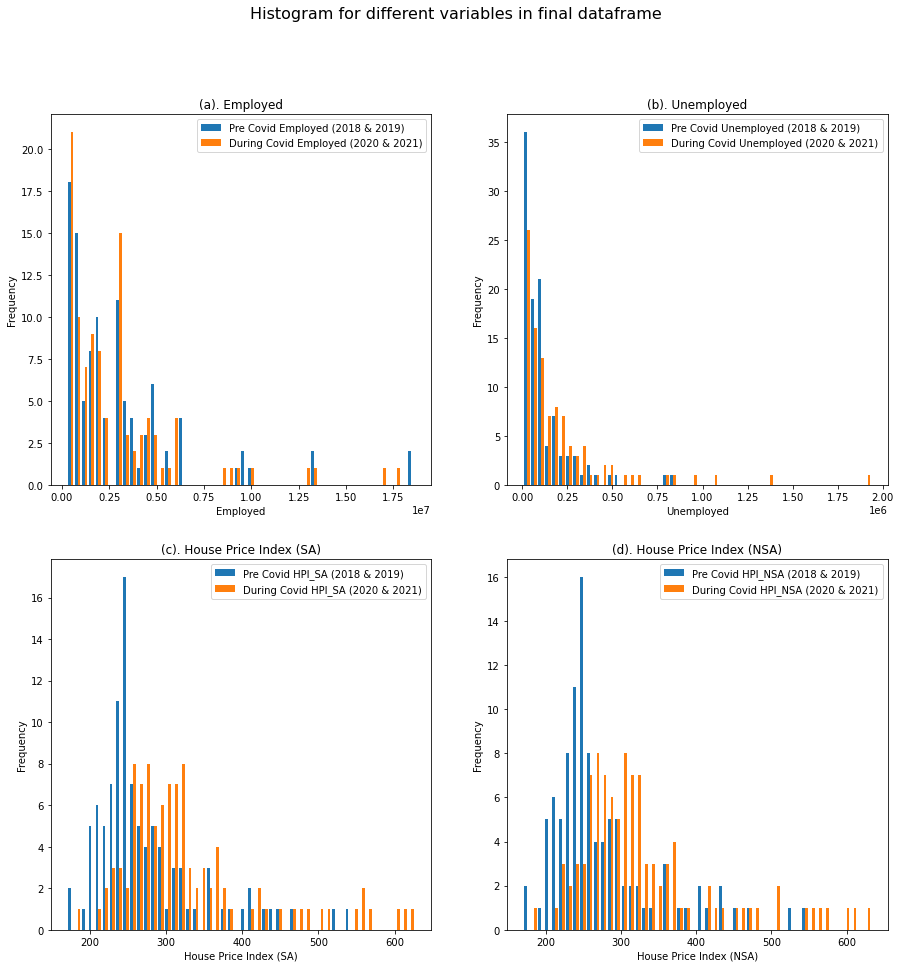

In [21]:
fig, ax = plt.subplots(2,2, figsize=(15, 15))

# Effect of Covid on Employment
ax[0,0].hist([pre_covid.Employed,during_covid.Employed], bins=50, label=['Pre Covid Employed (2018 & 2019)',
                                                                         'During Covid Employed (2020 & 2021)'])
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Employed')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('(a). Employed')

# Effect of Covid on Unemployemnt
ax[0,1].hist([pre_covid.Unemployed,during_covid.Unemployed], bins=50, label=['Pre Covid Unemployed (2018 & 2019)',
                                                                         'During Covid Unemployed (2020 & 2021)'])
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlabel('Unemployed')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('(b). Unemployed')

# Effect of Covid on House Price Index (Seasonally Adjusted)
ax[1,0].hist([pre_covid.HPI_SA,during_covid.HPI_SA], bins=50, label=['Pre Covid HPI_SA (2018 & 2019)',
                                                                         'During Covid HPI_SA (2020 & 2021)'])
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('House Price Index (SA)')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('(c). House Price Index (SA)')

# Effect of Covid on House Price Index (Non-Seasonally Adjusted)
ax[1,1].hist([pre_covid.HPI_NSA,during_covid.HPI_NSA], bins=50, label=['Pre Covid HPI_NSA (2018 & 2019)',
                                                                         'During Covid HPI_NSA (2020 & 2021)'])
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlabel('House Price Index (NSA)')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('(d). House Price Index (NSA)')

fig.suptitle('Histogram for different variables in final dataframe', fontsize = 16)
plt.show()

#### Idenifying the Outliers in the final data Set

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
fig = make_subplots(rows=2, cols=3)
fig.add_trace(go.Box(y=final_df["Employed"], name='Employed'), row=1, col=1)
fig.add_trace(go.Box(y=final_df["Unemployed"], name = 'Unemployed'), row=2, col=1)
fig.add_trace(go.Box(y=final_df["HPI_NSA"], name='HPI_NSA'), row=1, col=2)
fig.add_trace(go.Box(y=final_df["HPI_SA"], name = 'HPI_SA'), row=2, col=2)
fig.add_trace(go.Box(y=final_df["Total_Cases"], name='Total Covid Cases'), row=1, col=3)
fig.add_trace(go.Box(y=final_df["Total_Death"], name = 'Total Covid Deaths'), row=2, col=3)
fig.update_layout(
    title_text = 'Outliers in different variables of final dataset')
fig.show()

#### Here I am comparing PMF for pre covid (2018 and 2019) and during covid (2020 and 2021)

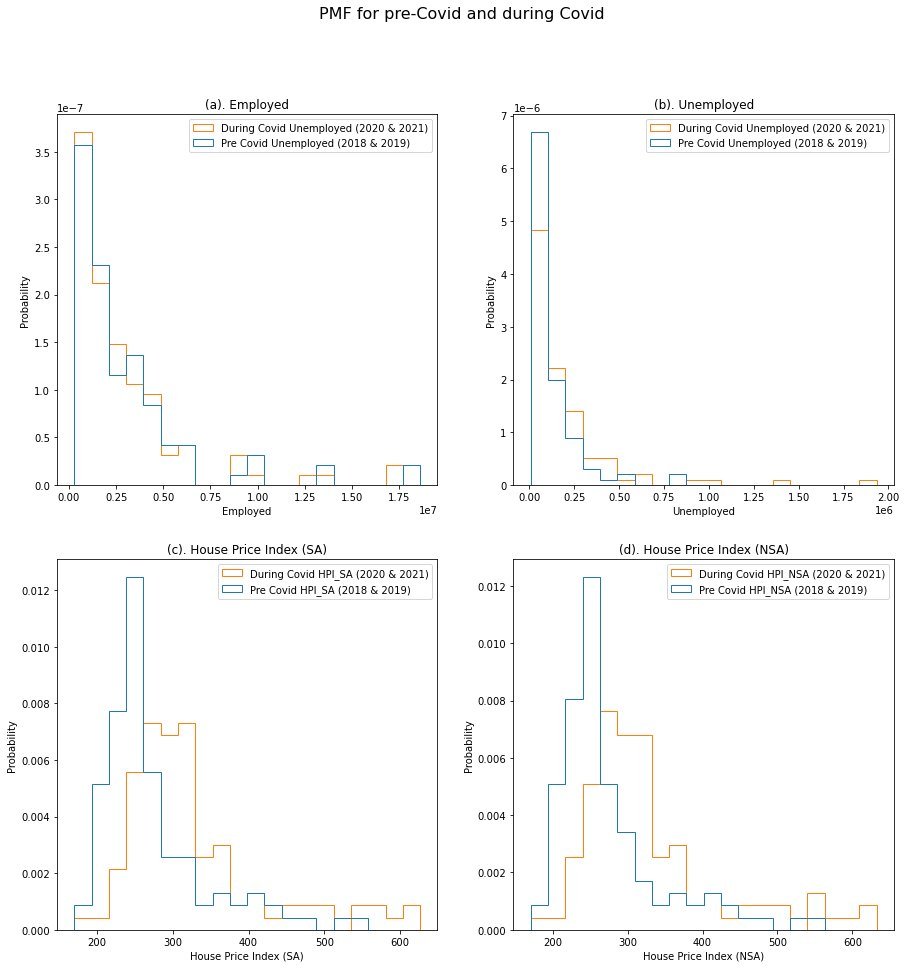

In [24]:
fig, ax = plt.subplots(2,2, figsize=(15, 15))

# Effect of Covid on Employment
ax[0,0].hist([pre_covid.Employed,during_covid.Employed], density=True, histtype='step', bins=20,
             label=['Pre Covid Unemployed (2018 & 2019)','During Covid Unemployed (2020 & 2021)'])
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Employed')
ax[0,0].set_ylabel('Probability')
ax[0,0].set_title('(a). Employed')

# Effect of Covid on Unemployemnt
ax[0,1].hist([pre_covid.Unemployed,during_covid.Unemployed], density=True, histtype='step', bins=20, 
             label=['Pre Covid Unemployed (2018 & 2019)', 'During Covid Unemployed (2020 & 2021)'])
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlabel('Unemployed')
ax[0,1].set_ylabel('Probability')
ax[0,1].set_title('(b). Unemployed')

# Effect of Covid on House Price Index (Seasonally Adjusted)
ax[1,0].hist([pre_covid.HPI_SA,during_covid.HPI_SA], density=True, histtype='step', bins=20, 
             label=['Pre Covid HPI_SA (2018 & 2019)', 'During Covid HPI_SA (2020 & 2021)'])
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('House Price Index (SA)')
ax[1,0].set_ylabel('Probability')
ax[1,0].set_title('(c). House Price Index (SA)')

# Effect of Covid on House Price Index (Non-Seasonally Adjusted)
ax[1,1].hist([pre_covid.HPI_NSA,during_covid.HPI_NSA], density=True, histtype='step', bins=20, 
             label=['Pre Covid HPI_NSA (2018 & 2019)', 'During Covid HPI_NSA (2020 & 2021)'])
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlabel('House Price Index (NSA)')
ax[1,1].set_ylabel('Probability')
ax[1,1].set_title('(d). House Price Index (NSA)')

fig.suptitle('PMF for pre-Covid and during Covid', fontsize = 16)
plt.show()

In [25]:
def cdf(data):
    """ Compute CDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

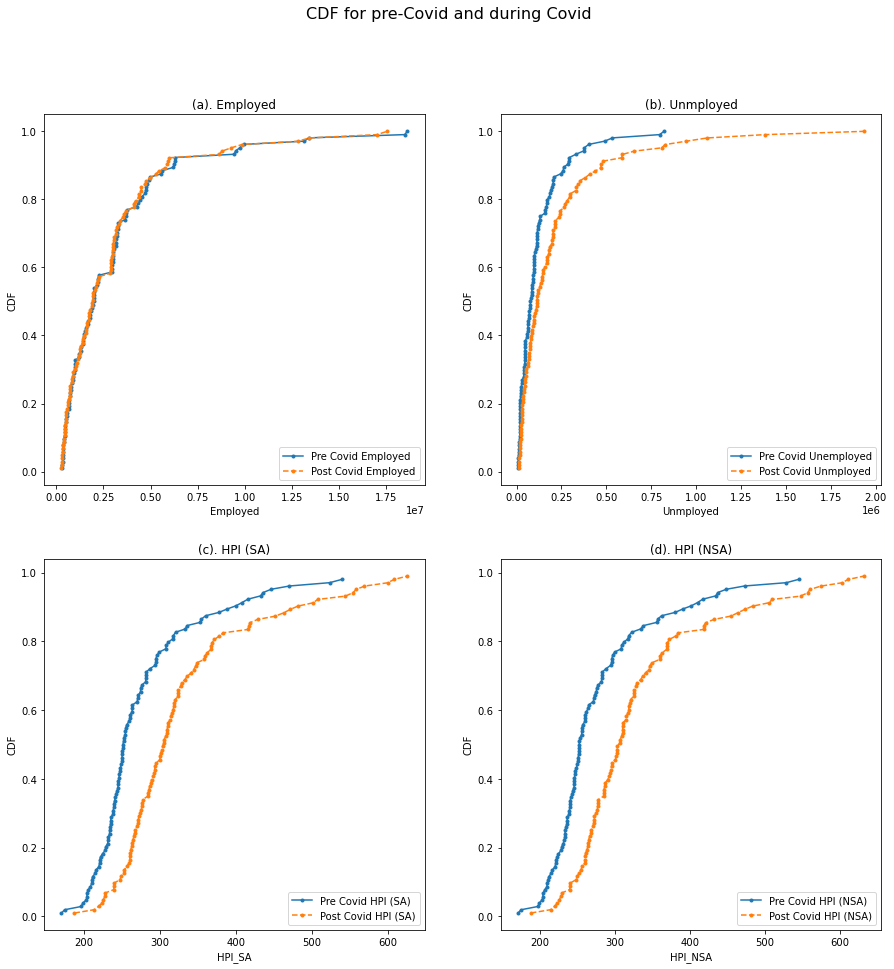

In [26]:
fig, ax = plt.subplots(2,2, figsize=(15, 15))

## Effect of Covid on Employment
# Generate CDFs for pre and during covid for Employment in US
x_pre_emp, y_pre_emp = cdf(pre_covid["Employed"])
x_during_emp, y_during_emp = cdf(during_covid["Employed"])

# Plot CDFs
ax[0,0].plot(x_pre_emp, y_pre_emp, marker='.', linestyle='solid')
ax[0,0].plot(x_during_emp, y_during_emp, marker='.', linestyle='dashed')
ax[0,0].legend(('Pre Covid Employed', 'Post Covid Employed'),loc="lower right")
ax[0,0].set_xlabel('Employed')
ax[0,0].set_ylabel('CDF')
ax[0,0].set_title('(a). Employed')

# Generate CDFs for pre and during covid for Unemployment in US
x_pre_unemp, y_pre_unemp = cdf(pre_covid["Unemployed"])
x_during_unemp, y_during_unemp = cdf(during_covid["Unemployed"])

# Effect of Covid on House Price Index (Seasonally Adjusted)
ax[0,1].plot(x_pre_unemp, y_pre_unemp, marker='.', linestyle='solid')
ax[0,1].plot(x_during_unemp, y_during_unemp, marker='.', linestyle='dashed')
ax[0,1].legend(('Pre Covid Unemployed', 'Post Covid Unmployed'),loc="lower right")
ax[0,1].set_xlabel('Unmployed')
ax[0,1].set_ylabel('CDF')
ax[0,1].set_title('(b). Unmployed')

# Generate CDFs for pre and during covid for HPI - SA in US
x_pre_sa, y_pre_sa = cdf(pre_covid["HPI_SA"])
x_during_sa, y_during_sa = cdf(during_covid["HPI_SA"])

# Effect of Covid on House Price Index (Seasonally Adjusted)
ax[1,0].plot(x_pre_sa, y_pre_sa, marker='.', linestyle='solid')
ax[1,0].plot(x_during_sa, y_during_sa, marker='.', linestyle='dashed')
ax[1,0].legend(('Pre Covid HPI (SA)', 'Post Covid HPI (SA)'),loc="lower right")
ax[1,0].set_xlabel('HPI_SA')
ax[1,0].set_ylabel('CDF')
ax[1,0].set_title('(c). HPI (SA)')

# Generate CDFs for pre and during covid for HPI - NSA in US
x_pre_nsa, y_pre_nsa = cdf(pre_covid["HPI_NSA"])
x_during_nsa, y_during_nsa = cdf(during_covid["HPI_NSA"])

# Effect of Covid on House Price Index (Not Seasonally Adjusted)
ax[1,1].plot(x_pre_nsa, y_pre_nsa, marker='.', linestyle='solid')
ax[1,1].plot(x_during_nsa, y_during_nsa, marker='.', linestyle='dashed')
ax[1,1].legend(('Pre Covid HPI (NSA)', 'Post Covid HPI (NSA)'),loc="lower right")
ax[1,1].set_xlabel('HPI_NSA')
ax[1,1].set_ylabel('CDF')
ax[1,1].set_title('(d). HPI (NSA)')

fig.suptitle('CDF for pre-Covid and during Covid', fontsize = 16)
plt.show()

#### Here I am using Normal Probability and Log-Normal Probability functions to understand the distribution of employed and unemployed data for before and during Covid-19.

In [27]:
def Var(xs, mu=None, ddof=0):
    """Computes variance.

    xs: sequence of values
    mu: option known mean
    ddof: delta degrees of freedom

    returns: float
    """
    xs = np.asarray(xs)

    if mu is None:
        mu = xs.mean()

    ds = xs - mu
    return np.dot(ds, ds) / (len(xs) - ddof)

In [28]:
def MeanVar(xs, ddof=0):
    """Computes mean and variance.
    
    xs: sequence of values
    ddof: delta degrees of freedom
    
    returns: pair of float, mean and var
    """
    xs = np.asarray(xs)
    mean = xs.mean()
    s2 = Var(xs, mean, ddof)
    return mean, s2

In [29]:
def Trim(t, p=0.01):
    """Trims the largest and smallest elements of t.

    Args:
        t: sequence of numbers
        p: fraction of values to trim off each end

    Returns:
        sequence of values
    """
    n = int(p * len(t))
    t = sorted(t)[n:-n]
    return t

In [30]:
def TrimmedMeanVar(t, p=0.01):
    """Computes the trimmed mean and variance of a sequence of numbers.

    Side effect: sorts the list.

    Args:
        t: sequence of numbers
        p: fraction of values to trim off each end

    Returns:
        float
    """
    t = Trim(t, p)
    mu, var = MeanVar(t)
    return mu, var

In [31]:
def FitLine(xs, inter, slope):
    """Fits a line to the given data.

    xs: sequence of x

    returns: tuple of numpy arrays (sorted xs, fit ys)
    """
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [32]:
def NormalProbability(ys):
    """Generates data for a normal probability plot.

    ys: sequence of values

    returns: numpy arrays xs, ys
    """
    n = len(ys)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    ys = np.array(ys)
    ys.sort()

    return xs, ys

In [33]:
def MakeNormalPlot(data):
    """Generates a normal probability plot of birth weights.

    data: sequence
    """
    mean, var = TrimmedMeanVar(data, p=0.01)
    std = np.sqrt(var)

    xs = [-3, 3]
    xs, ys = FitLine(xs, mean, std)
    plt.plot(xs, ys, color="0.8", label="model")

    xs, ys = NormalProbability(data)
    plt.plot(xs, ys, label="data")
    plt.show()

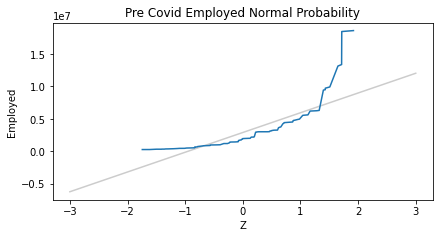

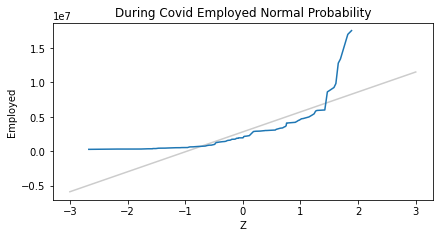

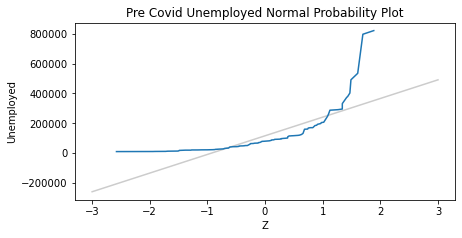

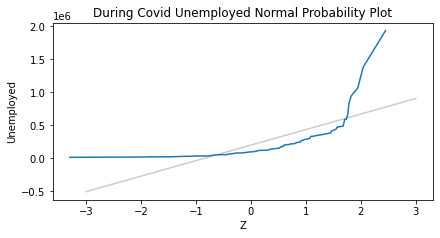

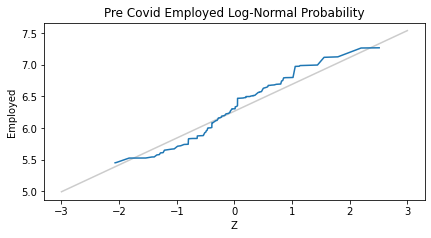

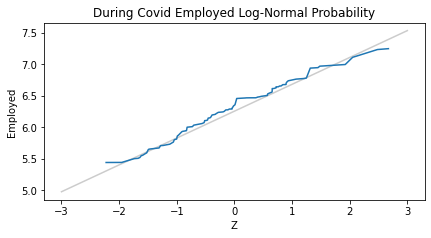

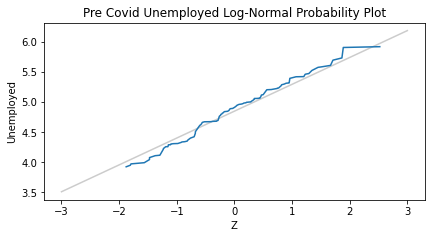

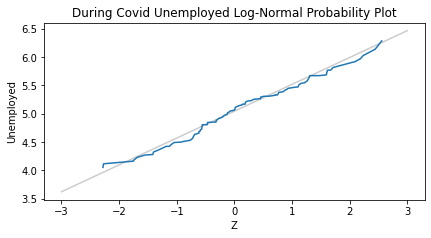

In [34]:
# Creating figure object

plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
plt.xlabel("Z")
plt.ylabel("Employed")
plt.title("Pre Covid Employed Normal Probability")
MakeNormalPlot(pre_covid["Employed"])

plt.figure(figsize=(15, 15))
plt.subplot(4,2,2)
plt.xlabel("Z")
plt.ylabel("Employed")
plt.title("During Covid Employed Normal Probability")
MakeNormalPlot(during_covid["Employed"])

plt.figure(figsize=(15, 15))
plt.subplot(4,2,3)
plt.xlabel("Z")
plt.ylabel("Unemployed")
plt.title("Pre Covid Unemployed Normal Probability Plot")
MakeNormalPlot(pre_covid["Unemployed"])

plt.figure(figsize=(15, 15))
plt.subplot(4,2,4)
plt.xlabel("Z")
plt.ylabel("Unemployed")
plt.title("During Covid Unemployed Normal Probability Plot")
MakeNormalPlot(during_covid["Unemployed"])

plt.figure(figsize=(15, 15))
plt.subplot(4,2,5)
plt.xlabel("Z")
plt.ylabel("Employed")
plt.title("Pre Covid Employed Log-Normal Probability")
MakeNormalPlot(np.log10(pre_covid["Employed"]))

plt.figure(figsize=(15, 15))
plt.subplot(4,2,6)
plt.xlabel("Z")
plt.ylabel("Employed")
plt.title("During Covid Employed Log-Normal Probability")
MakeNormalPlot(np.log10(during_covid["Employed"]))

plt.figure(figsize=(15, 15))
plt.subplot(4,2,7)
plt.xlabel("Z")
plt.ylabel("Unemployed")
plt.title("Pre Covid Unemployed Log-Normal Probability Plot")
MakeNormalPlot(np.log10(pre_covid["Unemployed"]))

plt.figure(figsize=(15, 15))
plt.subplot(4,2,8)
plt.xlabel("Z")
plt.ylabel("Unemployed")
plt.title("During Covid Unemployed Log-Normal Probability Plot")
MakeNormalPlot(np.log10(during_covid["Unemployed"]))

plt.show()

#### The employed and Unemployed data is best fitted for Log-Normal Probability distribution compared to Normal Probability distribution.

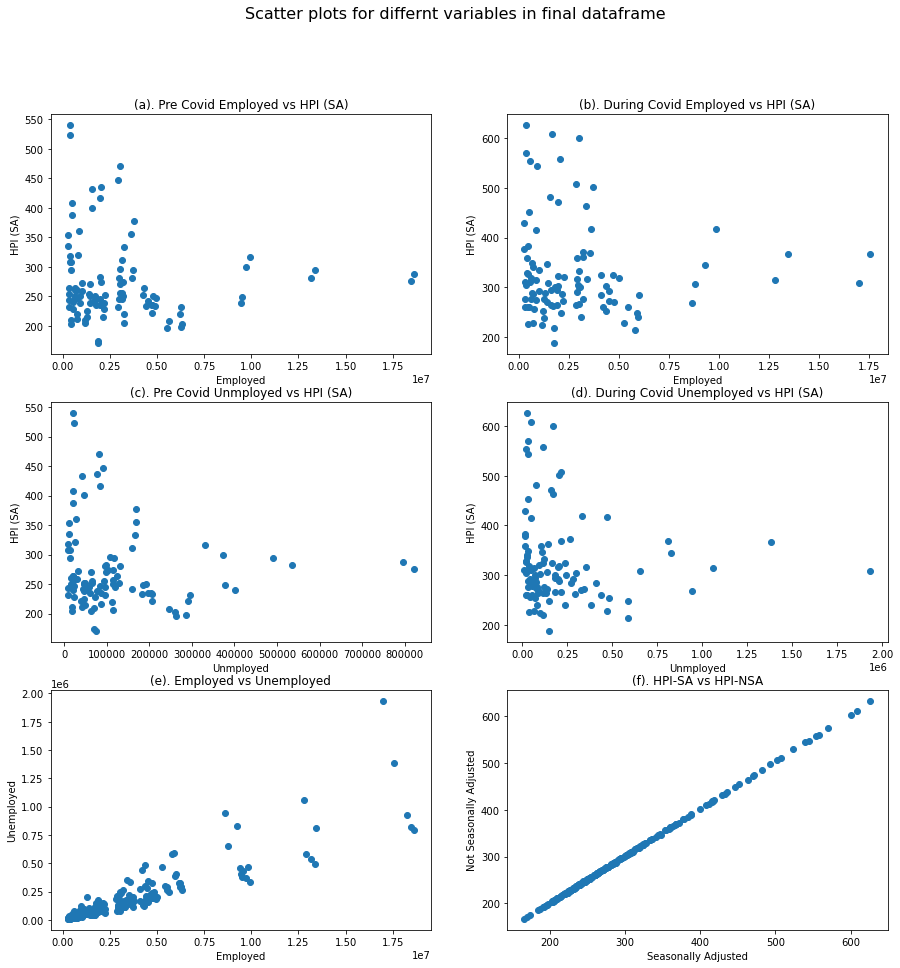

In [35]:
fig, ax = plt.subplots(3,2, figsize=(15, 15))

ax[0,0].scatter(pre_covid["Employed"], pre_covid["HPI_SA"])
ax[0,0].set_xlabel('Employed')
ax[0,0].set_ylabel('HPI (SA)')
ax[0,0].set_title('(a). Pre Covid Employed vs HPI (SA)')

ax[0,1].scatter(during_covid["Employed"], during_covid["HPI_SA"])
ax[0,1].set_xlabel('Employed')
ax[0,1].set_ylabel('HPI (SA)')
ax[0,1].set_title('(b). During Covid Employed vs HPI (SA)')

ax[1,0].scatter(pre_covid["Unemployed"], pre_covid["HPI_SA"])
ax[1,0].set_xlabel('Unmployed')
ax[1,0].set_ylabel('HPI (SA)')
ax[1,0].set_title('(c). Pre Covid Unmployed vs HPI (SA)')

ax[1,1].scatter(during_covid["Unemployed"], during_covid["HPI_SA"])
ax[1,1].set_xlabel('Unmployed')
ax[1,1].set_ylabel('HPI (SA)')
ax[1,1].set_title('(d). During Covid Unemployed vs HPI (SA)')

ax[2,0].scatter(final_df["Employed"], final_df["Unemployed"])
ax[2,0].set_xlabel('Employed')
ax[2,0].set_ylabel('Unemployed')
ax[2,0].set_title('(e). Employed vs Unemployed')

ax[2,1].scatter(final_df["HPI_SA"], final_df["HPI_NSA"])
ax[2,1].set_xlabel('Seasonally Adjusted')
ax[2,1].set_ylabel('Not Seasonally Adjusted')
ax[2,1].set_title('(f). HPI-SA vs HPI-NSA')

fig.suptitle('Scatter plots for differnt variables in final dataframe', fontsize = 16)

plt.show()

### Covariance, Pearson’s correlation, and Non-Linear Relationships-Spearman's Rank Correlation

In [36]:
def Cov(xs, ys, meanx=None, meany=None):
    """Computes Cov(X, Y).

    Args:
        xs: sequence of values
        ys: sequence of values
        meanx: optional float mean of xs
        meany: optional float mean of ys

    Returns:
        Cov(X, Y)
        """
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [37]:
def Corr(xs, ys):
    """Computes Corr(X, Y).

    Args:
        xs: sequence of values
        ys: sequence of values

    Returns:
        Corr(X, Y)
    """
    
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = MeanVar(xs)
    meany, vary = MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [38]:
def SpearmanCorr(xs, ys):
    """Computes Spearman's rank correlation.

    Args:
        xs: sequence of values
        ys: sequence of values

    Returns:
        float Spearman's correlation
    """
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [39]:
def norm_grp_stat(data1, data2):
    """Relationship between variables"""
    print(f"Covariance: {Cov(data1, data2)}")
    print(f"Pearson's Correlation: {Corr(data1, data2)}")
    print(f"Spearman's Rank Correlation: {SpearmanCorr(data1, data2)}")

In [40]:
# Relationship between Employed and HPI index
print("-"*50)
print("Relationship between Employed and NSI before Covid")
print(norm_grp_stat(pre_covid["Employed"], pre_covid["HPI_SA"]))
print("-"*50)
print("Realtionship between Employed and NSI during Covid")
print(norm_grp_stat(during_covid["Employed"], during_covid["HPI_SA"]))
print("-"*50)

--------------------------------------------------
Relationship between Employed and NSI before Covid
Covariance: nan
Pearson's Correlation: nan
Spearman's Rank Correlation: -0.1300473279766583
None
--------------------------------------------------
Realtionship between Employed and NSI during Covid
Covariance: nan
Pearson's Correlation: nan
Spearman's Rank Correlation: -0.08113609761889952
None
--------------------------------------------------


#### Both pre and during Covid correlation analysis show that there is no linear relationship between Employed and HPI. However, a week inverse non-linear relationship can be seen between Employed and HPI based on Spearman's Rank Correlation.

In [41]:
# Relationship between Unemployed and HPI index
print("-"*50)
print("Relationship between Unmployed and NSI before Covid")
print(norm_grp_stat(pre_covid["Unemployed"], pre_covid["HPI_SA"]))
print("-"*50)
print("Realtionship between Unemployed and NSI during Covid")
print(norm_grp_stat(during_covid["Unemployed"], during_covid["HPI_SA"]))
print("-"*50)

--------------------------------------------------
Relationship between Unmployed and NSI before Covid
Covariance: nan
Pearson's Correlation: nan
Spearman's Rank Correlation: -0.13933198002838548
None
--------------------------------------------------
Realtionship between Unemployed and NSI during Covid
Covariance: nan
Pearson's Correlation: nan
Spearman's Rank Correlation: -0.18798310442123595
None
--------------------------------------------------


#### Similar to Employed and HPI correlation, again both pre and during Covid analysis show that there is no linear relationship between Unemployed and HPI. However, a week inverse non-linear relationship can be seen between Unemployed and HPI based on Spearman's Rank Correlation.

In [42]:
# Relationship between Employed and Unemployed
print("-"*50)
print("Relationship between Employed and Unemployed before Covid")
print(norm_grp_stat(pre_covid["Employed"], pre_covid["Unemployed"]))
print("-"*50)
print("Realtionship between Employed and Unemployed during Covid")
print(norm_grp_stat(during_covid["Employed"], during_covid["Unemployed"]))
print("-"*50)

--------------------------------------------------
Relationship between Employed and Unemployed before Covid
Covariance: 477340186490.28424
Pearson's Correlation: 0.9879913808965752
Spearman's Rank Correlation: 0.9687826736370427
None
--------------------------------------------------
Realtionship between Employed and Unemployed during Covid
Covariance: 885823459013.9127
Pearson's Correlation: 0.9474965950002565
Spearman's Rank Correlation: 0.9512146905065237
None
--------------------------------------------------


#### A strong positive relationship can be seen for employed and unemployed data for both before and during covid-19. Before covid-19, the data is linearly related as Pearson's correlation is better than Spearman's Correlation. On contrary, during covid-19, Spearman's correlation is better than Pearson's correlation.

#### Causation and Correlation: Though the scatter plot shows there is a possible relation between House Price Index and Employment or Unemployment for both before and during Covid-19, the correlation analysis shows that employment/unemployment are not affecting the change in House Price Index. Therefore, there is an indirect correlation between employment and housing prices.

#### One positive note, as we know, employment and unemployment are correlated, and can be easily deduced from my above results.

In [43]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        """Computes the test statistic based on mean difference.

        data: data should be normalized by maximum value of the data       
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [44]:
def test_hypothesis(group1, group2):
    """Test the hypothesis among two groups with null hypothesis that there
    is no difference in the distributions of these two groups
    return: p-value if the distribution is significant
    """
    # Normalize the data so that order change in values doesn't make a difference
    data1 = group1/max(group1)
    data2 = group2/max(group2)
    data = data1, data2
    ht = HypothesisTest(data)
    pvalue = ht.PValue()
    return pvalue

#### The null hypothesis is that the distribution among employed and housing price index is same, and therefore, they are not connected to each other. If the p-value is less than 0.001 then the distribution is significant.

In [45]:
# Null hypothesis testing for employed and unepmployed before covid
print(test_hypothesis(pre_covid["Employed"], pre_covid["HPI_SA"]))
print(test_hypothesis(pre_covid["Unemployed"], pre_covid["HPI_SA"]))

0.0
0.0


#### Since the p-value for both pre-covid test is below 0.001, the distribution of employed or unemployed is not same as House Price Index (SA). 

#### Similarly, we can check the hypothesis testing for during covid for the distribution of employed or unemployed with HPI.

In [46]:
# Null hypothesis testing for employed and unepmployed during covid
print(test_hypothesis(during_covid["Employed"], during_covid["HPI_SA"]))
print(test_hypothesis(during_covid["Unemployed"], during_covid["HPI_SA"]))

0.0
0.0


#### For this as well the p-value is below 0.001, the distribution of employed/unemployed with HPI is different.

#### Just to check if our hypothesis test function is working or not, I checked the function with pre and during covid for employed data. The data should not be significantly different as the distribution is not going to change much.

In [47]:
# Null hypothesis testing for employed or unepmployed pre vs  during covid
print(test_hypothesis(pre_covid["Employed"], during_covid["Employed"]))
print(test_hypothesis(pre_covid["Unemployed"], during_covid["Unemployed"]))

0.842
0.109


#### As the p-value are greater than 0.001, the null hypothesis is correct that employed or unemployed data distribution before and during covid is same.

#### Since I am trying to understand the relation between employment/unemployment on House Price Index before and during Covid-19, my dependent variable is HPI.

#### First, I am linearly regressed HPI- Non-Seasonally adjusted to HPI -Seasonally adjusted for final dataframe to see if the correlation is good. If the correlation is good, then I am going to keep only HPI-SA.

In [48]:
import statsmodels.formula.api as smf

In [49]:
# Ordinary least square (OLS) model for HPI-SA and HPI-NSA
formula = 'final_df["HPI_SA"] ~ final_df["HPI_NSA"]'
model = smf.ols(formula, data=final_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     final_df["HPI_SA"]   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.020e+06
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:14:21   Log-Likelihood:                -296.53
No. Observations:                 255   AIC:                             597.1
Df Residuals:                     253   BIC:                             604.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3988      0.174      8.039      0.000       1.056       1.741
final_df["HPI_NSA"]     0.9916      0.001   1737.751      0.000       0.990       0.993
==============================================================================
Omnibus:                       21.996   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.054
Skew:                           0.470   Prob(JB):                     1.22e-09
Kurtosis:                       4.727   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Since HPI-SA and HPI-NSA are correlated, I will be using only HPI-SA data for my analysis onwards.

#### Now, first I will perform OLS regression on pre-covid19 data. Once I get some significant data, then I will compare the data to during covid data.

#### 1. OLS for HPI-SA with Employed data

In [50]:
formula = 'pre_covid["HPI_SA"] ~ pre_covid["Employed"]'
model = smf.ols(formula, data=pre_covid)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     pre_covid["HPI_SA"]   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                 -0.003
Method:                  Least Squares   F-statistic:                    0.7058
Date:                 Sun, 12 May 2024   Prob (F-statistic):              0.403
Time:                         21:14:21   Log-Likelihood:                -577.81
No. Observations:                  102   AIC:                             1160.
Df Residuals:                      100   BIC:                             1165.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               279.5354      9.396     29.750      0.000     260.894     298.177
pre_covid["Employed"] -1.719e-06   2.05e-06     -0.840      0.403   -5.78e-06    2.34e-06
==============================================================================
Omnibus:                       39.630   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.409
Skew:                           1.626   Prob(JB):                     4.22e-17
Kurtosis:                       5.677   Cond. No.                     6.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The p-value for OLS regression of HPI-SA and Employed data for pre-covid is above than 0.001, therefore the data are not correlated.

#### 2. OLS for HPI-SA with Unemployed data

In [51]:
formula = 'pre_covid["HPI_SA"] ~ pre_covid["Unemployed"]'
model = smf.ols(formula, data=pre_covid)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     pre_covid["HPI_SA"]   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9619
Date:                 Sun, 12 May 2024   Prob (F-statistic):              0.329
Time:                         21:14:21   Log-Likelihood:                -577.68
No. Observations:                  102   AIC:                             1159.
Df Residuals:                      100   BIC:                             1165.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 279.9990      9.108     30.743      0.000     261.930     298.068
pre_covid["Unemployed"] -4.757e-05   4.85e-05     -0.981      0.329      -0.000    4.87e-05
==============================================================================
Omnibus:                       39.456   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.729
Skew:                           1.622   Prob(JB):                     5.93e-17
Kurtosis:                       5.657   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Similar to above regression, this data correlation is not significant as p-value is well above 0.001.

#### Since linear regression for HPI and employment/unemployment data for pre-covid USA shows non-significance, I performed multiple regression. In multiple regression, I choose employment, unemployment, and states as the explanatory variables and HPI as the dependent variable.

#### 3. Multiple regression on pre-covid data for Employed in states on HPI

In [52]:
formula = 'pre_covid["HPI_SA"] ~ pre_covid["Employed"] + pre_covid["State"]'
model = smf.ols(formula, data=pre_covid)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     pre_covid["HPI_SA"]   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     135.0
Date:                 Sun, 12 May 2024   Prob (F-statistic):           2.13e-40
Time:                         21:14:22   Log-Likelihood:                -326.63
No. Observations:                  102   AIC:                             757.3
Df Residuals:                       50   BIC:                             893.8
Df Model:                           51                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  209.9788     10.634     19.745      0.000     188.619     231.339
pre_covid["State"][T.AL]  -307.5770     49.161     -6.257      0.000    -406.319    -208.835
pre_covid["State"][T.AR]  -182.7723     27.035     -6.760      0.000    -237.075    -128.470
pre_covid["State"][T.AZ]  -359.6918     76.244     -4.718      0.000    -512.833    -206.551
pre_covid["State"][T.CA] -2649.6080    478.517     -5.537      0.000   -3610.737   -1688.479
pre_covid["State"][T.CO]  -190.0013     70.283     -2.703      0.009    -331.169     -48.833
pre_covid["State"][T.CT]  -311.9276     41.221     -7.567      0.000    -394.723    -229.132
pre_covid["State"][T.DC]   266.5617      8.571     31.101      0.000     249.347     283.776
pre_covid["State"][T.DE]   -71.0599      9.165     -7.754      0.000     -89.468     -52.652
pre_covid["State"][T.FL] -1344.9749    249.719     -5.386      0.000   -1846.550    -843.400
pre_covid["State"][T.GA]  -694.5196    121.382     -5.722      0.000    -938.323    -450.716
pre_covid["State"][T.HI]   -53.2456     12.291     -4.332      0.000     -77.932     -28.559
pre_covid["State"][T.IA]  -211.6896     36.581     -5.787      0.000    -285.164    -138.215
pre_covid["State"][T.ID]     5.7013     16.009      0.356      0.723     -26.454      37.856
pre_covid["State"][T.IL]  -933.2379    156.884     -5.949      0.000   -1248.349    -618.127
pre_covid["State"][T.IN]  -478.5337     77.795     -6.151      0.000    -634.790    -322.277
pre_covid["State"][T.KS]  -176.8737     30.410     -5.816      0.000    -237.954    -115.793
pre_covid["State"][T.KY]  -259.8267     44.014     -5.903      0.000    -348.232    -171.421
pre_covid["State"][T.LA]  -226.8055     44.873     -5.054      0.000    -316.935    -136.676
pre_covid["State"][T.MA]  -464.4352     88.772     -5.232      0.000    -642.740    -286.131
pre_covid["State"][T.MD]  -428.5470     75.201     -5.699      0.000    -579.592    -277.502
pre_covid["State"][T.ME]   -54.7241     12.482     -4.384      0.000     -79.795     -29.654
pre_covid["State"][T.MI]  -678.8467    116.363     -5.834      0.000    -912.568    -445.125
pre_covid["State"][T.MN]  -362.5287     70.719     -5.126      0.000    -504.572    -220.485
pre_covid["State"][T.MO]  -406.5936     69.617     -5.840      0.000    -546.424    -266.763
pre_covid["State"][T.MS]  -180.0662     24.458     -7.362      0.000    -229.192    -130.940
pre_covid["State"][T.MT]   112.2120      9.783     11.470      0.000      92.562     131.862
pre_covid["State"][T.NC]  -666.2291    116.718     -5.708      0.000    -900.663    -431.795
pre_covid["State"][T.ND]    43.4690      8.699      4.997      0.000      25.997      60.941
pre_covid["State"][T.NE]   -92.8505     19.709     -4.711      0.000    -132.436     -53.265
pre

#### The multiple regression of dependent variable house price index with explanatory variables - employed and states showed that this model is highly predictive (with coefficient of determination, R2 = 0.993). However, the data is significant for major of the states with p-value < 0.001, except CO, ID, OR, SD, UT, VT are the states that were not showing the relationship significant.

#### 4. Multiple regression on pre-covid data for Unemployed in states on HPI

In [53]:
formula = 'pre_covid["HPI_SA"] ~ pre_covid["Unemployed"] + pre_covid["State"]'
model = smf.ols(formula, data=pre_covid)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     pre_covid["HPI_SA"]   R-squared:                       0.990
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                     97.22
Date:                 Sun, 12 May 2024   Prob (F-statistic):           6.79e-37
Time:                         21:14:22   Log-Likelihood:                -343.23
No. Observations:                  102   AIC:                             790.5
Df Residuals:                       50   BIC:                             926.9
Df Model:                           51                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  268.3403      7.754     34.609      0.000     252.767     283.914
pre_covid["State"][T.AL]    -9.7133     13.674     -0.710      0.481     -37.179      17.753
pre_covid["State"][T.AR]   -26.5458     10.917     -2.432      0.019     -48.473      -4.619
pre_covid["State"][T.AZ]   129.4113     24.549      5.271      0.000      80.102     178.720
pre_covid["State"][T.CA]   386.5507    124.202      3.112      0.003     137.084     636.018
pre_covid["State"][T.CO]   230.1349     14.401     15.981      0.000     201.211     259.059
pre_covid["State"][T.CT]   -62.7330     12.889     -4.867      0.000     -88.621     -36.845
pre_covid["State"][T.DC]   273.5553     10.002     27.349      0.000     253.465     293.646
pre_covid["State"][T.DE]   -52.9403     10.005     -5.291      0.000     -73.037     -32.844
pre_covid["State"][T.FL]   202.0429     53.023      3.810      0.000      95.542     308.543
pre_covid["State"][T.GA]    62.5915     29.255      2.140      0.037       3.832     121.351
pre_covid["State"][T.HI]    -5.3748     10.016     -0.537      0.594     -25.493      14.743
pre_covid["State"][T.IA]    -1.8168     10.694     -0.170      0.866     -23.296      19.663
pre_covid["State"][T.ID]    83.9659     10.035      8.368      0.000      63.811     104.121
pre_covid["State"][T.IL]    58.4835     40.960      1.428      0.160     -23.787     140.754
pre_covid["State"][T.IN]    -3.7756     17.676     -0.214      0.832     -39.279      31.728
pre_covid["State"][T.KS]    -1.1124     10.889     -0.102      0.919     -22.984      20.760
pre_covid["State"][T.KY]    11.4163     14.296      0.799      0.428     -17.298      40.131
pre_covid["State"][T.LA]    56.0177     16.003      3.500      0.001      23.874      88.162
pre_covid["State"][T.MA]    77.1510     19.160      4.027      0.000      38.668     115.635
pre_covid["State"][T.MD]    33.1950     18.118      1.832      0.073      -3.195      69.585
pre_covid["State"][T.ME]    -3.5195      9.999     -0.352      0.726     -23.603      16.564
pre_covid["State"][T.MI]    54.4235     30.623      1.777      0.082      -7.084     115.931
pre_covid["State"][T.MN]    67.3997     16.290      4.138      0.000      34.681     100.119
pre_covid["State"][T.MO]    14.1261     15.495      0.912      0.366     -16.996      45.248
pre_covid["State"][T.MS]   -30.8054     12.321     -2.500      0.016     -55.553      -6.057
pre_covid["State"][T.MT]   139.0116      9.999     13.902      0.000     118.927     159.096
pre_covid["State"][T.NC]    64.2049     29.077      2.208      0.032       5.802     122.607
pre_covid["State"][T.ND]    48.7974     10.146      4.810      0.000      28.419      69.176
pre_covid["State"][T.NE]    11.3873     10.138      1.123      0.267      -8.975      31.750
pre

#### The multiple regression of dependent variable house price index with explanatory variables - unemployed and states showed that this model is highly predictive (with coefficient of determination, R2 = 0.990). Contrary to multiple regression with employed with states, unemployed with states regression showed that only a limited states have significant relation (p-value < 0.001). These states include AZ, CO, CT, DC, DE, FL, ID, LA, MA, MN, MT, ND, OR, SD, UT, WA, and WY dataset are significant.

#### 5. Multiple regression on during-covid data for Employed in states on HPI

In [54]:
formula = 'during_covid["HPI_SA"] ~ during_covid["Employed"] + during_covid["State"]'
model = smf.ols(formula, data=during_covid)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     during_covid["HPI_SA"]   R-squared:                       0.939
Model:                                OLS   Adj. R-squared:                  0.876
Method:                     Least Squares   F-statistic:                     15.03
Date:                    Sun, 12 May 2024   Prob (F-statistic):           9.53e-18
Time:                            21:14:22   Log-Likelihood:                -464.35
No. Observations:                     102   AIC:                             1033.
Df Residuals:                          50   BIC:                             1169.
Df Model:                              51                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     226.6652     26.450      8.570      0.000     173.540     279.791
during_covid["State"][T.AL]  -380.1592     78.436     -4.847      0.000    -537.703    -222.616
during_covid["State"][T.AR]  -218.4988     49.615     -4.404      0.000    -318.154    -118.844
during_covid["State"][T.AZ]  -449.5781    119.803     -3.753      0.000    -690.209    -208.948
during_covid["State"][T.CA] -3271.7275    664.132     -4.926      0.000   -4605.675   -1937.780
during_covid["State"][T.CO]  -246.8292    107.140     -2.304      0.025    -462.026     -31.633
during_covid["State"][T.CT]  -365.2909     64.525     -5.661      0.000    -494.892    -235.689
during_covid["State"][T.DC]   301.0910     32.809      9.177      0.000     235.191     366.991
during_covid["State"][T.DE]   -74.0761     33.204     -2.231      0.030    -140.768      -7.385
during_covid["State"][T.FL] -1717.5351    362.812     -4.734      0.000   -2446.265    -988.805
during_covid["State"][T.GA]  -885.6764    180.812     -4.898      0.000   -1248.849    -522.504
during_covid["State"][T.HI]   -47.6377     34.585     -1.377      0.175    -117.105      21.829
during_covid["State"][T.IA]  -261.6171     59.726     -4.380      0.000    -381.580    -141.654
during_covid["State"][T.ID]    83.6993     39.037      2.144      0.037       5.292     162.107
during_covid["State"][T.IL] -1147.7729    219.082     -5.239      0.000   -1587.812    -707.734
during_covid["State"][T.IN]  -584.5371    115.083     -5.079      0.000    -815.688    -353.386
during_covid["State"][T.KS]  -216.1680     54.212     -3.987      0.000    -325.057    -107.279
during_covid["State"][T.KY]  -317.8900     70.320     -4.521      0.000    -459.132    -176.648
during_covid["State"][T.LA]  -292.5864     70.378     -4.157      0.000    -433.944    -151.228
during_covid["State"][T.MA]  -562.1203    127.130     -4.422      0.000    -817.469    -306.772
during_covid["State"][T.MD]  -530.8688    109.803     -4.835      0.000    -751.416    -310.322
during_covid["State"][T.ME]   -34.8458     35.105     -0.993      0.326    -105.355      35.664
during_covid["State"][T.MI]  -821.1080    163.954     -5.008      0.000   -1150.420    -491.796
during_covid["State"][T.MN]  -461.6842    106.811     -4.322      0.000    -676.220    -247.149
during_covid["State"][T.MO]  -507.5875    105.653     -4.804      0.000    -719.797    -295.378
during_covid["State"][T.MS]  -216.3411     46.422     -4.660      0.000    -309.583    -123.099
during_covid["State"][T.MT]   174.4144     33.672      5.180      0.000     106.781     242.047
during_covid["State"][T.NC]  -832.5823    171.040     -4.868      0.000   -1176.126    -489.039
during_covid["State"][T.ND]    40.7413     32.886      1.239   

#### The multiple regression of dependent variable house price index with explanatory variables - employed and states during Covid-19 showed that this model is predictive (with coefficient of determination, R2 = 0.939). The data is significant for major of the states with p-value < 0.001, except CO, DE, HI, ID, ME, ND, NE, NH, NM, NV, OR, RI, SD, UT, and VT are the states that were not showing the relationship significant. 

#### 6. Multiple regression on during-covid data for Unemployed in states on HPI

In [55]:
formula = 'during_covid["HPI_SA"] ~ during_covid["Unemployed"] + during_covid["State"]'
model = smf.ols(formula, data=during_covid)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     during_covid["HPI_SA"]   R-squared:                       0.939
Model:                                OLS   Adj. R-squared:                  0.877
Method:                     Least Squares   F-statistic:                     15.11
Date:                    Sun, 12 May 2024   Prob (F-statistic):           8.59e-18
Time:                            21:14:22   Log-Likelihood:                -464.12
No. Observations:                     102   AIC:                             1032.
Df Residuals:                          50   BIC:                             1169.
Df Model:                              51                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     296.6474     23.165     12.806      0.000     250.119     343.175
during_covid["State"][T.AL]    -2.4342     32.981     -0.074      0.941     -68.678      63.810
during_covid["State"][T.AR]   -21.7776     32.777     -0.664      0.509     -87.613      44.058
during_covid["State"][T.AZ]   174.2548     34.027      5.121      0.000     105.910     242.600
during_covid["State"][T.CA]   446.1916     85.578      5.214      0.000     274.303     618.080
during_covid["State"][T.CO]   303.9616     33.679      9.025      0.000     236.316     371.607
during_covid["State"][T.CT]   -61.2190     33.116     -1.849      0.070    -127.735       5.297
during_covid["State"][T.DC]   307.9897     32.713      9.415      0.000     242.283     373.696
during_covid["State"][T.DE]   -46.3183     32.714     -1.416      0.163    -112.027      19.390
during_covid["State"][T.FL]   242.7813     44.513      5.454      0.000     153.374     332.189
during_covid["State"][T.GA]    62.8156     34.721      1.809      0.076      -6.924     132.556
during_covid["State"][T.HI]    15.5853     32.753      0.476      0.636     -50.200      81.371
during_covid["State"][T.IA]     1.1588     32.814      0.035      0.972     -64.749      67.067
during_covid["State"][T.ID]   193.4557     32.721      5.912      0.000     127.733     259.178
during_covid["State"][T.IL]    48.2045     39.546      1.219      0.229     -31.227     127.636
during_covid["State"][T.IN]     4.9617     33.546      0.148      0.883     -62.418      72.342
during_covid["State"][T.KS]     9.8835     32.773      0.302      0.764     -55.943      75.710
during_covid["State"][T.KY]    14.6363     32.983      0.444      0.659     -51.611      80.884
during_covid["State"][T.LA]    48.5142     33.231      1.460      0.151     -18.233     115.261
during_covid["State"][T.MA]   115.4881     35.016      3.298      0.002      45.157     185.819
during_covid["State"][T.MD]    35.9717     33.778      1.065      0.292     -31.874     103.818
during_covid["State"][T.ME]    29.6877     32.715      0.907      0.369     -36.022      95.397
during_covid["State"][T.MI]    69.8682     36.996      1.889      0.065      -4.441     144.178
during_covid["State"][T.MN]    77.4449     33.265      2.328      0.024      10.630     144.260
during_covid["State"][T.MO]    27.5807     33.344      0.827      0.412     -39.394      94.555
during_covid["State"][T.MS]   -37.6036     32.835     -1.145      0.258    -103.555      28.348
during_covid["State"][T.MT]   212.6654     32.713      6.501      0.000     146.959     278.371
during_covid["State"][T.NC]    72.2588     35.148      2.056      0.045       1.662     142.855
during_covid["State"][T.ND]    51.7284     32.715      1.581   

#### The multiple regression of dependent variable house price index with explanatory variables - unemployed and states showed that this model is predictive (with coefficient of determination, R2 = 0.939). Contrary to multiple regression with employed with states, unemployed with states regression showed that only a limited states have significant relation (p-value < 0.001). These states include AZ, CA, CO, DC, FL, ID, MT, NY, OR, TX, UT, WA, WY are significant.

### Statistical/Hypothetical Question
The hypothesis of this study is the impact on US Housing Price Index during Covid-19 is due to the loss in US employment.

### Outcome of EDA
Three data sets were obtained from well-known open sources of US government. First challenge was to clean these three datasets and merge into one single data set. The visualization of data suggests that there is indeed a relation between employment or unemployment before and during covid, where employment was high before pandemic and unemployment was high during pandemic. Similarly, House Pricing Index before and after Covid are significantly related where HPI increased drastically after pandemic.

It was interesting to learn that there is no significant linear relation between employment and HPI. So, it is still unclear that increase in HPI during covid is due to increase in unemployment during this period. The analysis of covariance, Pearson's correlation and Spearman's Rank correlation suggested that there is no direct correlation of HPI with employment and unemployment data. The Ordinary Least Square linear regression suggested the same. 

The multiple regression, on contrary, predicts that there are states that hold the relation of employment and HPI significant, and other states doesn’t hold the relation to be true. This suggests that the entire US data on employment have not impacted HPI increase during pandemic but is state specific. Therefore, further data analysis of individual states may show which states have employment-based impact on HPI.

### What might be missing during the analysis?
a. The dataset is analyzed for all US states. So, the study provides a generic picture of US employment and house pricing index. However, each state may present their unique stories based on their counties. Individual states can be analyzed on similar approach as outlined in this project.

b. The study has summarized results for yearly; however, monthly dataset for employment, HPI, and Covid-19 may provide a better time series analysis.

### Were there any other variables that could have helped in the analysis?
I think if I have a complete time series analysis, which was limited because this data set doesn't include the months data for HPI and Employment, the analysis might have been more in-depth. Also, state wise comparison based on counties data would have reflected a more in-depth data analysis.

### Were there any assumptions might be incorrect?
a. I assumed that HPI is a total reflection of all home sales; however, it is just the price index for single family housing. So, other houses like condos and townhomes data might have impacted the overall analysis.

b. While cleaning the data, I had 4 quarters of data for HPI. Therefore, I took the mean of all four quarters to reflect the HPI for the entire year. Though is a good assumption but may under-represent the true HPI.

### What challenges were faced?
a. The biggest challenge was to clean three datasets and merge them into a single dataframe so that I should not lose any essential information. 

b. The other challenge was to find the right regression model to understand true relationship between HPI and employment.
